#**Exploratory data analysis**

###**Understanding the dataset**

In [143]:
import pandas as pd

In [144]:
df = pd.read_csv('https://github.com/IgorNascAlves/data_flight_delays/blob/main/data/flights.csv?raw=True')

In [145]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [42]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
df.shape

(71175, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [8]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
dtype: int64

In [29]:
df['schengen'].value_counts(normalize=True)*100

schengen        59.808922
non-schengen    40.191078
Name: schengen, dtype: float64

In [30]:
df['is_holiday'].value_counts(normalize=True)*100

False    94.520548
True      5.479452
Name: is_holiday, dtype: float64

###**Data visualization**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

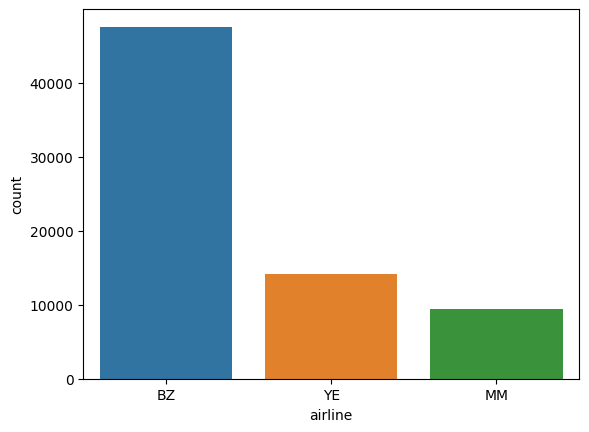

In [26]:
order = df['airline'].value_counts().index
sns.countplot(data=df, x='airline', order=order)
plt.show()

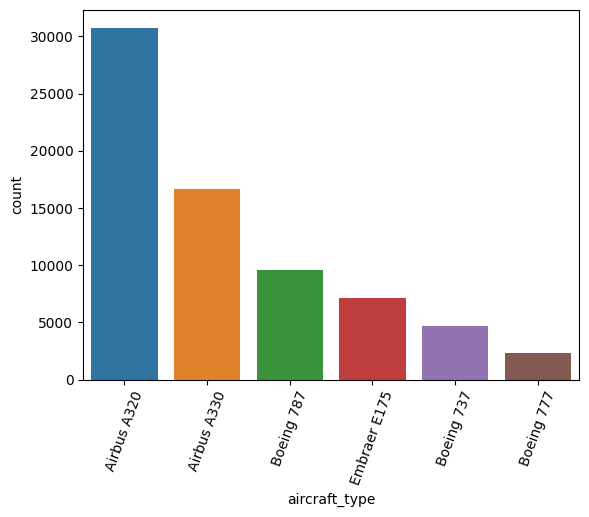

In [25]:
order = df['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type', order = order)
plt.xticks(rotation=70)
plt.show()

<Axes: xlabel='schengen', ylabel='count'>

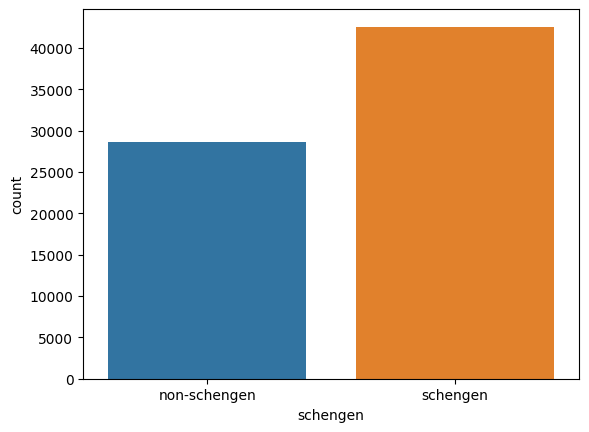

In [22]:
sns.countplot(data=df, x='schengen')

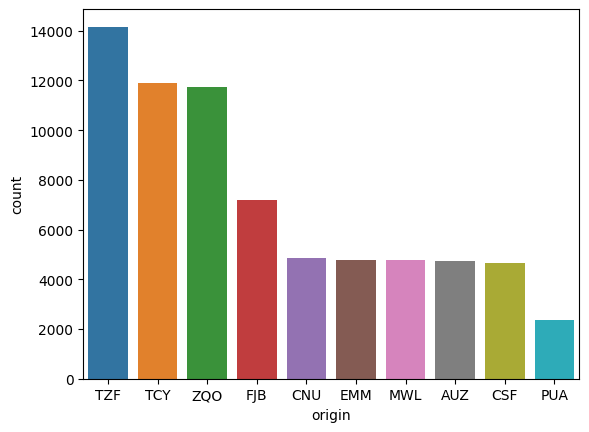

In [27]:
order = df['origin'].value_counts().index
sns.countplot(data=df, x='origin', order=order)
plt.show()

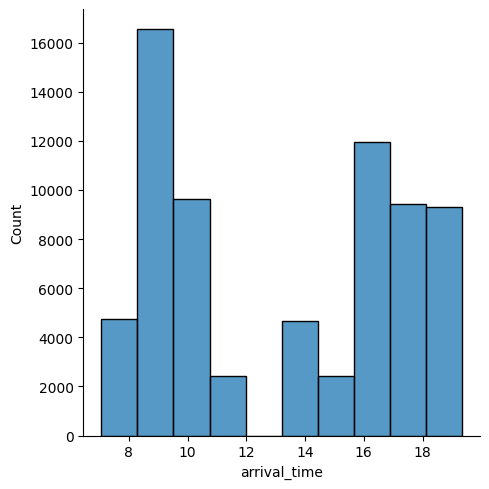

In [37]:
sns.displot(data=df, x='arrival_time', bins=10)
plt.show()

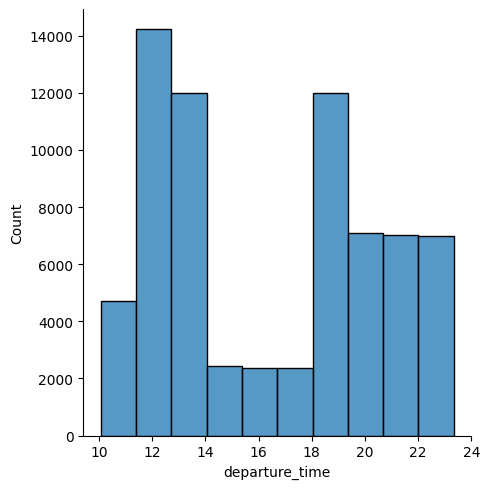

In [36]:
sns.displot(data=df, x='departure_time', bins=10)
plt.show()

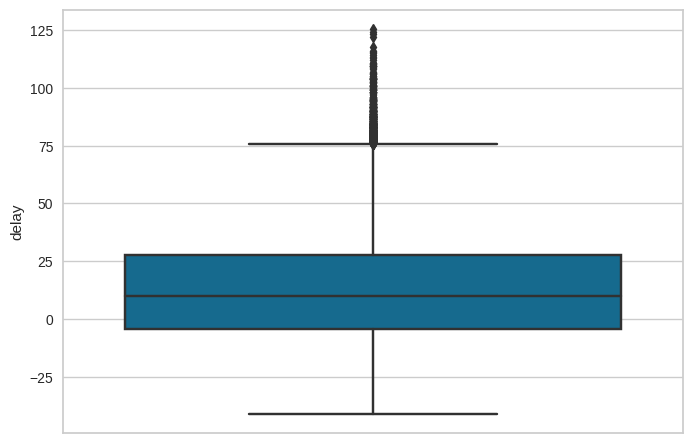

In [146]:
sns.boxplot(data=df, y='delay')
plt.show()

In [39]:
df['delay'].mean()

12.548378015698628

#**Data processing**

###**Outliers treatment**

In [147]:
# Calculate the interquartile range (IQR)
Q1 = df['delay'].quantile(0.25)
Q3 = df['delay'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['delay'] >= Q1 - 1.5 * IQR) & (df['delay'] <= Q3 + 1.5 * IQR)]

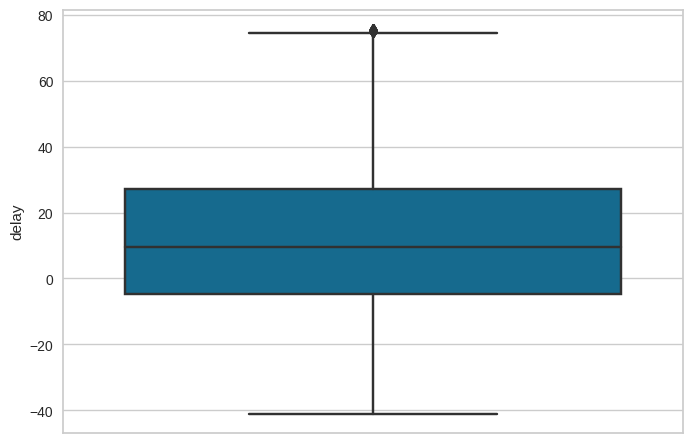

In [149]:
sns.boxplot(data=df, y='delay')
plt.show()

In [150]:
df['delay'].mean()

11.877307979359534

###**Feature engineering**

In [43]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [151]:
df['is_weekend'] = df['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [152]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,True
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,True
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,True
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,True
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,True


###**Feature Encoding**

In [153]:
df['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [154]:
df['is_holiday'].unique()

array([False,  True])

In [155]:
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].map({False: 0, True: 1})

In [156]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,is_weekend
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,1
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,1
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,1
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,1
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,1


###**Handling categorical variables**

In [157]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [158]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,is_weekend,airline_BZ,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,26,0,8.885071,10.885071,0,2010,0,70.205981,1,0,...,0,0,0,0,0,0,0,1,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,1,1,...,0,0,0,0,0,0,0,0,1,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,1,1,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,1,1,...,0,0,0,0,1,0,0,0,0,0


###**Data cleaning**

In [159]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973645
departure_time,0.973645,1.000000


In [160]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,0,8.885071,0,70.205981,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,8.939996,0,38.484609,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,18.635384,0,2.388305,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,15.967963,0,19.138491,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#**Model Selection and Validation**

###**Train and test split**

In [161]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [162]:
X.head()

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,...,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,0,8.885071,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,8.939996,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,18.635384,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,15.967963,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [163]:
y.head()

0    70.205981
1    38.484609
2     2.388305
3    19.138491
4    15.016271
Name: delay, dtype: float64

In [164]:
import numpy as np
np.random.seed(7562)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###**Training DummyRegressor**

In [191]:
from sklearn.dummy import DummyRegressor

# Training the model
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train, y_train)

# Predictions
y_pred_dummy = model_dummy.predict(X_test)

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_regression_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print('Root Mean Squared Error:', rmse)

    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)

In [193]:
calculate_regression_metrics(y_test, y_pred)

Mean Squared Error: 491.9992292854628
Root Mean Squared Error: 22.18105563956465
Mean Absolute Error: 18.090721244225875
R-squared: -1.1232015144857499e-05


###**Training RandomForestRegressor**

In [196]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

In [197]:
calculate_regression_metrics(y_test, y_pred_rf)

Mean Squared Error: 67.77502495290123
Root Mean Squared Error: 8.232558833856046
Mean Absolute Error: 6.110052998848193
R-squared: 0.8622441211921416


###**Plots for analyzing linear regression models**

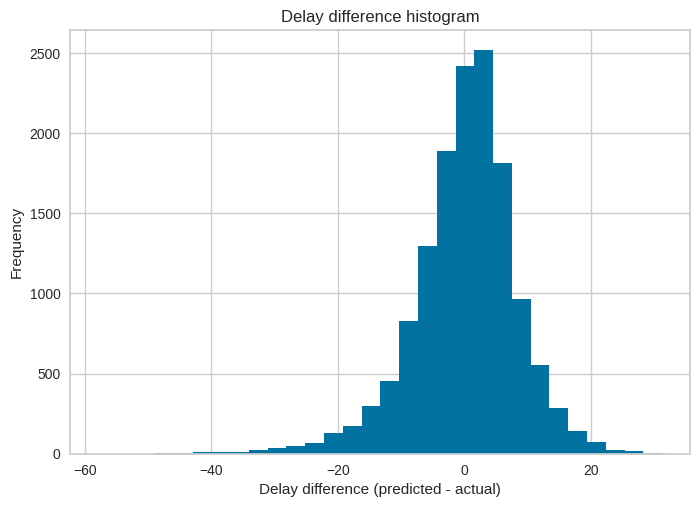

In [198]:
# Calculate the difference between estimated and actual delays
delay_diff = y_pred_rf - y_test

# Plot a delay difference histogram
plt.hist(delay_diff, bins=30)
plt.xlabel('Delay difference (predicted - actual)')
plt.ylabel('Frequency')
plt.title('Delay difference histogram')
plt.show()

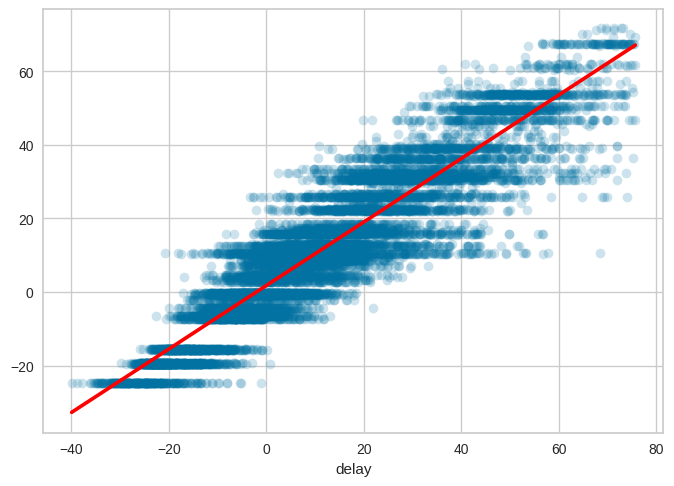

In [200]:
# Prediction error plot
sns.regplot(x=y_test, y=y_pred_rf, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.2})
plt.show()

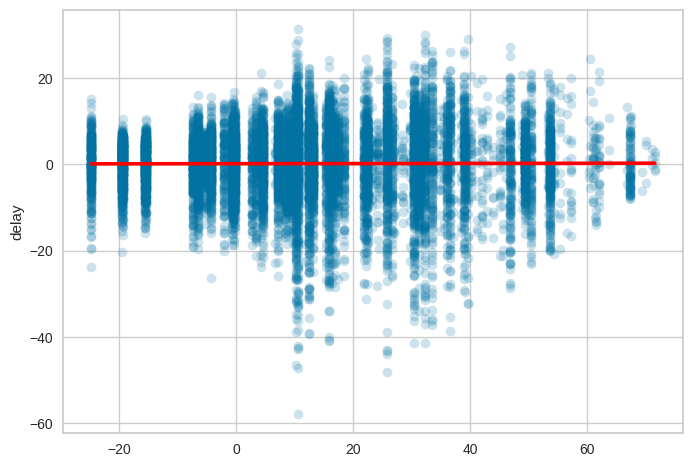

In [201]:
# Homoscedasticity analysis
sns.regplot(x = y_pred_rf, y =y_pred_rf-y_test, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.2})
plt.show()

###**Cross-validation**

In [202]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Defining evaluation metrics
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation and calculating metrics
cv_results = cross_validate(model_rf, X, y, cv=5, scoring=scoring)

# Extracting evaluation metrics
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculating the standard deviation of metrics
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Printing evaluation metrics and standard deviation
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [66.49035779 70.00181126 67.81519863 66.99874323 66.24089203]
RMSE Scores: [8.15416199 8.36670851 8.2349984  8.185276   8.13885078]
MAE Scores: [6.03902654 6.21019738 6.08063967 6.06185715 6.06431945]
R2 Scores: [0.86482252 0.85850714 0.86224947 0.86131517 0.86359046]
----------------------------------------------------------------
MSE Mean: 67.5094005880605, MSE Std: 1.3574944965044813
RMSE Mean: 8.215999136335437, RMSE Std: 0.08221179839805556
MAE Mean: 6.091208038106155, MAE Std: 0.060954954225885226
R2 Mean: 0.8620969538378498, R2 Std: 0.0021531616973868993


#**Hyperparameter Optimization**

###**Feature selection**

In [203]:
# Getting feature importance
importances = model_rf.feature_importances_

# Creating a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Defining the number of top features to be selected
feature_counts = [5, 10, 15, len(X.columns)]

# DataFrame to store the results
results_df = pd.DataFrame(index=['MSE', 'RMSE', 'MAE', 'R2'], columns=feature_counts)

for count in feature_counts:
    # Selecting the top features
    selected_features = feature_importances['Feature'].values[:count]

    # Filtering the original DataFrame columns with the selected features
    X_selected = X[selected_features]

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

    # Training the model with the selected top features only
    model_selected_features = RandomForestRegressor()
    model_selected_features.fit(X_train, y_train)

    # Making predictions
    y_pred = model_selected_features.predict(X_test)

    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Storing the results in the DataFrame
    results_df[count] = [mse, rmse, mae, r2]

# DataFrame with the results
results_df

,5,10,15,23
MSE,131.955531,68.290903,68.192669,68.049824
RMSE,11.487190,8.263831,8.257885,8.249232
MAE,9.089482,6.130727,6.152583,6.114092
R2,0.730179,0.856123,0.859962,0.862799


In [204]:
feature_importances

,Feature,Importance
4,airline_BZ,0.383703
3,is_weekend,0.235763
2,is_holiday,0.103205
7,aircraft_type_Airbus A320,0.067865
8,aircraft_type_Airbus A330,0.048769
12,aircraft_type_Embraer E175,0.037412
1,arrival_time,0.031755
11,aircraft_type_Boeing 787,0.019595
20,origin_TCY,0.018310
17,origin_FJB,0.012629


In [205]:
X_selected_features = X_selected.iloc[:, :10]

In [206]:
X_selected_features

,airline_BZ,is_weekend,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_FJB
0,0,1,0,1,0,0,8.885071,0,1,0
1,0,1,0,1,0,0,8.939996,0,1,0
2,1,1,0,0,0,1,18.635384,0,0,0
3,1,1,0,0,1,0,15.967963,0,0,0
4,1,1,0,0,1,0,16.571894,0,0,1
...,...,...,...,...,...,...,...,...,...,...
71170,1,1,1,0,0,1,18.635384,0,0,0
71171,1,1,1,0,1,0,16.718722,0,0,0
71172,0,1,1,0,0,0,8.564949,1,0,0
71173,1,1,1,1,0,0,9.344097,0,0,0


###**Grid search for hyperparameter tuning**

In [207]:
# Defining the hyperparameters to be optimized

param_grid = {
 'max_depth': [None, 10, 20],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [200, 300, 500]}

In [210]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be optimized
modelo_grid = GridSearchCV(model_rf, param_grid=param_grid, cv=5, scoring='r2')

# Training
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2)
modelo_grid.fit(X_train, y_train)

# Obtaining the best values for each parameter
best_params = modelo_grid.best_params_

best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

###**Model selection and comparison**

In [212]:
# Training the model
model_tunned = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=200)
model_tunned.fit(X_train, y_train)

# Predictions
y_pred_tunned = model_tunned.predict(X_test)

In [213]:
calculate_regression_metrics(y_test, y_pred_tunned)

Mean Squared Error: 66.80354467273143
Root Mean Squared Error: 8.173343543050875
Mean Absolute Error: 6.037091986638636
R-squared: 0.8649769033384924


> **Model before feature selection and hyperparameter tuning**
- Mean Squared Error: 67.77502495290123
- Root Mean Squared Error: 8.232558833856046
- Mean Absolute Error: 6.110052998848193
- R-squared: 0.8622441211921416

###**Saving trained regression models for future use**

In [218]:
import pickle

# Specify the file path where you want to save the model
file_path = 'model_tunned.pkl'

# Save the model using pickle
with open(file_path, 'wb') as file:
    pickle.dump(model_tunned, file)

print("Model saved successfully!")

Model saved successfully!
